In [6]:
import math
import data
import random
import plotly.express as px

### Part 2: Scalar backpropagation

##### Question 3

In [ ]:
def forward_pass(W, V, X, t_index, b, c):
    k, h = [0., 0., 0.], [0., 0., 0.]
    o, y = [0., 0.], [0., 0.]
    
    # linear
    for j in range(3):
        for i in range(2):
            k[j] += W[i][j] * X[i]
        k[j] += b[j]

    # sigmoid activation
    for i in range(3):
        h[i] = (1+math.exp(-k[i]))**(-1)

    # linear
    for i in range(2):
        for j in range(3):
            o[i] += h[j] * V[j][i]
        o[i] += c[i]

    #softmax activation
    sum_exp_output = sum([math.exp(output) for output in o])
    for i in range(2):
        y[i] = math.exp(o[i])/ sum_exp_output

    # compute loss
    loss = (-1*math.log(y[t_index]))

    context = W, V, X, t_index, b, c, k, h, o, y
    return loss, context

In [ ]:
def backward_pass(context, alpha=0.01):
    W, V, X, t_index, b, c, k, h, o, y = context
    dy, do = [0., 0.], [0., 0.]
    dV, dW = [[0., 0.], [0., 0.], [0., 0.]], [[0., 0. , 0.], [0., 0., 0.]]
    dh, dk = [0. , 0., 0.], [0. , 0., 0.]
    db = [0., 0., 0.]

    # compute d(Loss)/dy[i]
    for i in range(2):
        if i == t_index: dy[i] = -1/y[i]
        else: dy[i] = 0

    # compute d(Loss)/do[i]
    for i in range(2):
        for j in range(2):
            if i != j and i == t_index:
                do[j] += dy[i]*(-1)*y[i]*y[j]
            elif i == j and i == t_index:
                do[j] += dy[i]*y[i]*(1-y[i])
            elif i != t_index:
                do[j] += 0

    # compute d(Loss)/dV[j][i] and d(Loss)/dh[i]
    for i in range(2):
        for j in range(3): 
            dV[j][i] = do[i]*h[j]
            dh[j] += do[i]*V[j][i]
    dc = do

    # compute d(Loss)/dk[i]
    for j in range(3):
        dk[j] = dh[j] * h[j] * (1-h[j])

    # compute d(Loss)/dW[i][j] and d(Loss)/db[j]
    for j in range(3):
        for i in range(2):
            dW[i][j] = dk[j] * X[i]
        db[j] = dk[j]

    # update W and b parameters
    for j in range(3):
        for i in range(2):
            W[i][j] += -alpha*dW[i][j]
        b[j] += -alpha*db[j]

    # update V and c parameters
    for i in range(2):
        for j in range(3): 
            V[j][i] += -alpha*dV[j][i]
        c[i] += -alpha*dc[i]

    results = W, V, b, c
    gradients = dy, do, dh, dk, dV, dW, db, dc
    return gradients, results

In [ ]:
## Test forward pass
W, V= [[1.,1.,1.], [-1,-1,-1]], [[1.,1.], [-1.,-1.], [-1., -1.]]
b, c = [0, 0, 0], [0, 0]
X, t = [1, -1], 0
loss = 0

loss, context = forward_pass(W, V, X, t, b, c)
print("Loss: ", loss)

## Test backward pass
gradients, results = backward_pass(context)
dy, do, dh, dk, dV, dW, db, dc = gradients

print("Gradient of W: ", dW)
print("Gradient of b: ", db)
print("Gradient of V: ", dV)
print("Gradient of c: ", dc)

print(results)

Loss:  0.6931471805599453
Gradient of W:  [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
Gradient of b:  [0.0, 0.0, 0.0]
Gradient of V:  [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
Gradient of c:  [-0.5, 0.5]
([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]], [[1.0044039853898894, 0.9955960146101106], [-0.9955960146101106, -1.0044039853898894], [-0.9955960146101106, -1.0044039853898894]], [0.0, 0.0, 0.0], [0.005, -0.005])


##### Question 4

In [ ]:
(xtrain, ytrain), (xval, yval), num_cls = data.load_synth()

In [ ]:
ytrain.shape

(60000,)

In [ ]:
def initialize_weights(is_random=True):
    r = random.gauss # mu=0 and sigma=1
    if not is_random:
        W, V= [[1.,1.,1.], [-1,-1,-1]], [[1.,1.], [-1.,-1.], [-1., -1.]]
        b, c = [0, 0, 0], [0, 0]
    else:
        W, V= [[r(0,1),r(0,1),r(0,1)], [r(0,1),r(0,1),r(0,1)]], [[r(0,1),r(0,1)], [r(0,1),r(0,1)], [r(0,1),r(0,1)]]
        b, c = [0, 0, 0], [0, 0]
    
    return W, V, b, c

In [ ]:
def calculate_accuracy():
  pass

In [ ]:
W, V, b, c = initialize_weights(is_random=True)

# save loss values for train and validation
avg_loss_train, avg_loss_val = [], []
loss_train_epoch1, loss_val_epoch1 = [], []
epochs = 10
alpha = 0.01 # learning rate

# loss_train_epoch1, loss_val_epoch1 = [], []

for epoch in range(epochs):
    # train data
    loss_train, loss_val = [], []
    for X, t_index in zip(xtrain, ytrain): 
        loss, context = forward_pass(W, V, list(X), t_index, b, c)
        
        gradients, results = backward_pass(context, alpha)
        W, V, b, c  = results

        loss, context = forward_pass(W, V, list(X), t_index, b, c)
        loss_train.append(loss)

    # validation data
    for X, t_index in zip(xval, yval): 
        loss, context = forward_pass(W, V, list(X), t_index, b, c)
        loss_val.append(loss)
    
    # if epoch==1:
    #   loss_train_epoch1 = loss_train
    #   loss_val_epoch1 = loss_val

    avg_loss_train.append(sum(loss_train)/len(loss_train))
    avg_loss_val.append(sum(loss_val)/len(loss_val))


In [ ]:
import pandas as pd

avg_loss = []
vector_epochs = [i for i in range(len(avg_loss_train))]
avg_loss += avg_loss_train
name = ['train' for _ in range(len(avg_loss_train))]
vector_epochs += [i for i in range(len(avg_loss_val))]
avg_loss += avg_loss_val
name += ['val' for _ in range(len(avg_loss_val))]

df = pd.DataFrame({'epochs': vector_epochs,'SGD Average loss per epoch': avg_loss, 'name': name})
fig = px.line(df, x='epochs', y='SGD Average loss per epoch', color='name', markers=True, width=600, height=400)
fig.show()

In [ ]:
# samples = [i for i in range(len(loss_train_epoch1))]
# loss_epoch1 = loss_train_epoch1
# name = ['train' for _ in range(len(loss_train_epoch1))]

# df = pd.DataFrame({'samples': samples,'loss_epoch1': loss_epoch1, 'name': name})
# fig = px.line(df, x='samples', y='loss_epoch1', color='name', markers=True)
# fig.show()

### Part 3: Tensor backpropagation

##### *Helper Functions*

In [21]:
import numpy as np
from tqdm.auto import tqdm 

In [22]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def normalize_data(dataset):
    return (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))

def standardize_data(dataset):
    return (dataset - dataset.mean()) / dataset.std()

def initialize_weights_vector(input_size, nr_classes=10, nr_hlayers=300):
    W = np.random.normal(0, 1, size=(input_size, nr_hlayers))
    V = np.random.normal(0, 1, size=(nr_hlayers, nr_classes))
    b, c = np.array([0.] * nr_hlayers), np.array([0.] * nr_classes)

    return W, V, b, c

def convert_onehotencoding(y, t_index):
    # https://stackoverflow.com/questions/29816117/numpy-set-one-specific-element-of-each-column-based-on-indexing-by-array
    t = np.zeros(y.shape)
    t[np.arange(y.shape[0]), t_index] = 1
    return t

##### Question 5

In [13]:
(x_train, y_train), (x_val, y_val), num_mcls = data.load_mnist()

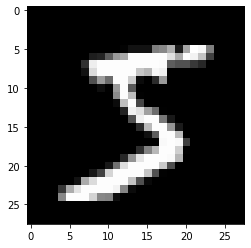

In [14]:
# visualize the data
import matplotlib.pyplot as plt

img = x_train[0,:].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

**Network Vectorized**

In [15]:
def update_weights(W, V, b, c, gradients, alpha=0.01):
    dV, dW, db, dc = gradients
    W = W - alpha*dW
    b = b - alpha*db
    V = V - alpha*dV
    c = c - alpha*dc

    return W, V, b, c

def compute_loss_acc(y, t_index):
    # pick the y value that corresponds to y_c
    loss = np.mean(-np.log(y[np.arange(y.shape[0]), t_index]))
    preds = list(np.argmax(y, axis=1))
    accuracy = np.mean(preds == t_index)
    return loss, accuracy

def forward_pass_vectorized(X, W, V, b, c):
    # linear
    k = np.dot(X, W) + b

    # sigmoid activation
    h = sigmoid(k)

    # linear
    o = np.dot(h, V) + c

    # softmax activation
    exp_o = np.exp(o)
    y = exp_o/np.sum(exp_o, axis=1, keepdims=True)

    context = k, h, o, y
    return context

def backward_pass_vectorized(X, t_index, V, context):
    k, h, o, y = context

    # compute d(Loss)/do[i]
    # https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/
    t = convert_onehotencoding(y, t_index)
    do = (y-t)

    # compute d(Loss)/dV[j][i] and d(Loss)/dh[i]
    dV = (h.T) @ do
    dh = do @ V.T
    dc = np.sum(do, axis=0)

    # compute d(Loss)/dk[i]
    dk = np.multiply(np.multiply(dh, h), (1-h))

    # compute d(Loss)/dW[i][j] and d(Loss)/db[j]
    dW = X.T @ dk
    db = np.sum(dk, axis=0)

    return dV, dW, db, dc

In [25]:
# Test vectorized version
W, V= np.array([[1.,1.,1.], [-1,-1,-1]]), np.array([[1.,1.], [-1.,-1.], [-1., -1.]])
b, c = np.array([0, 0, 0]), np.array([0, 0])
X, t_index = np.array([[1, -1]]), np.array([0])

context = forward_pass_vectorized(X, W, V, b, c)
gradients = backward_pass_vectorized(X, t_index, V, context)
dV, dW, db, dc = gradients
(W, V, b, c) = update_weights(W, V, b, c, gradients)

# loss and accuracy for batch data
context = forward_pass_vectorized(X, W, V, b, c)
_, _, _, pred = context
loss, acc = compute_loss_acc(pred, t_index)

print('Loss: ', loss)
print('Accuracy: ', acc)

print("Gradient of W: ", dW)
print("Gradient of b: ", db)
print("Gradient of V: ", dV)
print("Gradient of c: ", dc)

print('W, V, b, c', W, V, b, c)
#([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]], [[1.0044039853898894, 0.9955960146101106], [-0.9955960146101106, -1.0044039853898894], [-0.9955960146101106, -1.0044039853898894]], [0.0, 0.0, 0.0], [0.005, -0.005])


Loss:  0.6766485175434298
Accuracy:  1.0
Gradient of W:  [[0. 0. 0.]
 [0. 0. 0.]]
Gradient of b:  [0. 0. 0.]
Gradient of V:  [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
Gradient of c:  [-0.5  0.5]
W, V, b, c [[ 1.  1.  1.]
 [-1. -1. -1.]] [[ 1.00440399  0.99559601]
 [-0.99559601 -1.00440399]
 [-0.99559601 -1.00440399]] [0. 0. 0.] [ 0.005 -0.005]


##### Question 6

In [17]:
# train data
def train(x_train, t_index, x_val, t_val, num_mcls, nr_hlayers, epochs, alpha, batch_size=1, plot_batches=True):
    (W, V, b, c) = initialize_weights_vector(x_train.shape[1], nr_classes=num_mcls, nr_hlayers=nr_hlayers)

    # In this case mini batch becomes same as batch gradient descent
    if batch_size > x_train.shape[0]:
        batch_size = x_train.shape[0]

    num_batches = round(x_train.shape[0] / batch_size)
    batches, y_batches = np.array_split(x_train, num_batches), np.array_split(t_index, num_batches)

    epochs_loss_train, epochs_loss_val, epochs_batch_loss = [], [], []
    epochs_acc_train, epochs_acc_val, epochs_batch_acc = [], [], []

    for epoch in tqdm(range(epochs), desc='epochs'):
        for (batch_X, batch_t_index) in tqdm(zip(batches, y_batches), total=len(y_batches), desc='train', position=0):
            context = forward_pass_vectorized(batch_X, W, V, b, c)
            gradients = backward_pass_vectorized(batch_X, batch_t_index, V, context)

            (W, V, b, c) = update_weights(W, V, b, c, gradients, alpha=alpha)

            if plot_batches:
                # loss and accuracy for batch data
                context = forward_pass_vectorized(batch_X, W, V, b, c)
                _, _, _, pred = context
                loss, acc = compute_loss_acc(pred, batch_t_index)
                epochs_batch_loss.append(loss)
                epochs_batch_acc.append(acc)

        # train
        context = forward_pass_vectorized(x_train, W, V, b, c)
        _, _, _, pred_train = context
        loss_train, acc_train = compute_loss_acc(pred_train, t_index)
        epochs_loss_train.append(loss_train)
        epochs_acc_train.append(acc_train)

        # validation
        context = forward_pass_vectorized(x_val, W, V, b, c)
        _, _, _, pred_val = context
        loss_val, acc_val = compute_loss_acc(pred_val, t_val)
        epochs_loss_val.append(loss_val)
        epochs_acc_val.append(acc_val)

        print("Epoch {}: Train Loss: {} - Train Accuracy: {}".format(
            epoch, round(epochs_loss_train[epoch], 5), round(epochs_acc_train[epoch], 5)))
        print("Epoch {}: Validation Loss: {} - Validation Accuracy: {}".format(
            epoch, round(epochs_loss_val[epoch], 5), round(epochs_acc_val[epoch], 5)))

    return epochs_loss_train, epochs_acc_train, \
           epochs_loss_val, epochs_acc_val, \
           epochs_batch_loss, epochs_batch_acc

In [18]:
def run(dataset, alpha, batch_size, nr_hlayers=300, epochs=5):
    (x_train, y_train), (x_val, y_val), num_mcls = dataset
    x_train, x_val = normalize_data(x_train), normalize_data(x_val) # normalize data

    epochs_loss_train, epochs_acc_train, \
        epochs_loss_val, epochs_acc_val, \
        epochs_batch_loss, epochs_batch_acc = \
        train(x_train, y_train, x_val, y_val, num_mcls, nr_hlayers, epochs, alpha, batch_size)

    print("Final Train Loss: {} - Final Train Accuracy: {}".format(
        round(epochs_loss_train[-1], 5), round(epochs_acc_train[-1], 5)))
    print("Final Validation Loss: {} - Final Validation Accuracy: {}".format(
        round(epochs_loss_val[-1], 5), round(epochs_acc_val[-1], 5)))
    
    return (epochs_loss_train, epochs_acc_train, \
        epochs_loss_val, epochs_acc_val, \
        epochs_batch_loss, epochs_batch_acc)

In [19]:
import pandas as pd

def plot_diagrams(epochs_loss_train, epochs_acc_train,
                  epochs_loss_val, epochs_acc_val, 
                  epochs_batch_loss=[], epochs_batch_acc=[], total_epochs=None):
    batch_list = []
    if len(epochs_batch_loss)>0: batch_list = list(normalize_data([i for i in range(len(epochs_batch_loss))])*total_epochs)
      
    loss = epochs_loss_train + epochs_loss_val + epochs_batch_loss
    acc = epochs_acc_train + epochs_acc_val + epochs_batch_acc
    vector_epochs = [i for i in range(1, len(epochs_loss_train)+1)]*2
    vector_epochs += batch_list
    name = ['train']*len(epochs_loss_train) + ['val']*len(epochs_loss_train) + ['batch']*len(epochs_batch_acc)

    df = pd.DataFrame({'epochs': vector_epochs,'loss': loss, 'name': name})
    fig = px.line(df, x='epochs', y='loss', color='name', markers=False, width=600, height=400)
    fig.show()

    df = pd.DataFrame({'epochs': vector_epochs,'Accuracy': acc, 'name': name})
    fig = px.line(df, x='epochs', y='Accuracy', color='name', markers=False, width=600, height=400)
    fig.show()

### Part 4: Analysis

In [3]:
import plotly.graph_objs as go

In [7]:
# dataset = data.load_synth()
dataset = data.load_mnist()

Download complete.
Save complete.


##### Question 7.1

In [ ]:
# 1.
# Experiment one: Compare the training loss per epoch to the validation loss per epoch
alpha, batch_size = 0.01, 550

results_one = run(dataset, alpha, batch_size)

loss_train_res_one, acc_train_res_one, \
           loss_val_res_one, acc_val_res_one, \
           batch_loss_res_one, batch_acc_res_one = results_one
plot_diagrams(loss_train_res_one, acc_train_res_one,
              loss_val_res_one, acc_val_res_one,
              [], [], total_epochs=len(loss_train_res_one))


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.40211 - Train Accuracy: 0.88604
Epoch 0: Validation Loss: 0.34309 - Validation Accuracy: 0.903


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.28397 - Train Accuracy: 0.91745
Epoch 1: Validation Loss: 0.26275 - Validation Accuracy: 0.9236


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.23026 - Train Accuracy: 0.93209
Epoch 2: Validation Loss: 0.22644 - Validation Accuracy: 0.934


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.19678 - Train Accuracy: 0.94209
Epoch 3: Validation Loss: 0.20526 - Validation Accuracy: 0.9396


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.17286 - Train Accuracy: 0.94902
Epoch 4: Validation Loss: 0.1909 - Validation Accuracy: 0.944
Final Train Loss: 0.17286 - Final Train Accuracy: 0.94902
Final Validation Loss: 0.1909 - Final Validation Accuracy: 0.944


In [ ]:
# same plots with the batch data included
plot_diagrams(loss_train_res_one, acc_train_res_one,
              loss_val_res_one, acc_val_res_one,
              batch_loss_res_one, batch_acc_res_one, total_epochs=len(loss_train_res_one))

##### Question 7.2

In [8]:
def preprocess_data(results_two_run1, results_two_run2, results_two_run3):
    name = []
    data_objectives = ['loss', 'acc'] #index%2
    epochs_list = {'loss': {'train': [], 'validation': [], 'batch': []}, 'acc': {'train': [], 'validation': [], 'batch': []}}
    avg_list = {'loss': {'train': [], 'validation': [], 'batch': []}, 'acc': {'train': [], 'validation': [], 'batch': []}}
    std_list =  {'loss': {'train': [], 'validation': [], 'batch': []}, 'acc': {'train': [], 'validation': [], 'batch': []}}
    data_names = ['train', 'train', 'validation', 'validation', 'batch', 'batch']
    epochs = 5

    for index, (result1, result2, result3) in enumerate(zip(results_two_run1, results_two_run2, results_two_run3)):
        if data_names[index] == 'batch': 
            epochs_list[data_objectives[index%2]][data_names[index]] += list(normalize_data([i for i in range(len(result1))])*epochs)
        else:
          epochs_list[data_objectives[index%2]][data_names[index]] += [i for i in range(1, epochs+1)]

        avg_list[data_objectives[index%2]][data_names[index]] += list(np.mean([result1, result2, result3], axis=0))
        std_list[data_objectives[index%2]][data_names[index]] += list(np.std([result1, result2, result3], axis=0))
        # name += [data_names[index]]*len(result1)

    df_train_loss = pd.DataFrame({'epochs': epochs_list['loss']['train'], 'avg': avg_list['loss']['train'], 'std':std_list['loss']['train']})
    df_val_loss = pd.DataFrame({'epochs': epochs_list['loss']['validation'], 'avg': avg_list['loss']['validation'], 'std':std_list['loss']['validation']})
    df_batch_loss = pd.DataFrame({'epochs': epochs_list['loss']['batch'], 'avg': avg_list['loss']['batch'], 'std':std_list['loss']['batch']})

    df_train_acc = pd.DataFrame({'epochs': epochs_list['acc']['train'], 'avg': avg_list['acc']['train'], 'std':std_list['acc']['train']})
    df_val_acc = pd.DataFrame({'epochs': epochs_list['acc']['validation'], 'avg': avg_list['acc']['validation'], 'std':std_list['acc']['validation']})
    df_batch_acc = pd.DataFrame({'epochs': epochs_list['acc']['batch'], 'avg': avg_list['acc']['batch'], 'std':std_list['acc']['batch']})

    return (df_train_loss, df_val_loss, df_batch_loss), (df_train_acc, df_val_acc, df_batch_acc)

In [26]:
def plot_avg_std(results_run1, results_run2, results_run3):
    (df_train_loss, df_val_loss, df_batch_loss), \
      (df_train_acc, df_val_acc, df_batch_acc) = \
        preprocess_data(results_run1, results_run2, results_run3)

    names = ['train', 'validation', 'batch']
    objectives = ['loss', 'acc']
    color_line = ['rgb(31, 119, 180)', 'rgb(135, 30, 181)', 'rgb(30, 181, 133)']
    color_std = ['#5579aa','#9f55aa', '#3d5435']
    for name in objectives:
        fig = go.Figure()
        if name == 'acc': 
            df_train = df_train_acc
            df_val = df_val_acc
            df_batch = df_batch_acc
        else:
            df_train = df_train_loss
            df_val = df_val_loss
            df_batch = df_batch_loss
        for index, df in enumerate([df_train, df_val, df_batch]):
            fig.add_scatter(
                name=names[index],
                x=df['epochs'],
                y=df['avg'],
                mode='lines',
                line=dict(color=color_line[index]),
            )
            fig.add_scatter(
                name='Upper Bound ' + names[index],
                x=df['epochs'],
                y=df['avg']+df['std'],
                mode='lines',
                marker=dict(color=color_std[index]),
                line=dict(width=0),
                showlegend=False
            )
            fig.add_scatter(
                name='Lower Bound ' + names[index],
                x=df['epochs'],
                y=df['avg']-df['std'],
                marker=dict(color=color_std[index]),
                line=dict(width=0),
                mode='lines',
                fillcolor='rgba(68, 68, 68, 0.3)',
                fill='tonexty',
                showlegend=False
            )
            if index == 1:
                fig.update_layout(
                    yaxis_title=name,
                    xaxis_title='epochs',
                    hovermode="x",
                    width=600, height=400
                )
                fig.show()

In [23]:
# 2.
# Experiment two: Test
# Train the neural network from a random initialization multiple times (at least 3) and
# plot an average and a standard deviation

alpha, batch_size = 0.01, 550

results_two_run1 = run(dataset, alpha, batch_size)
results_two_run2 = run(dataset, alpha, batch_size)
results_two_run3 = run(dataset, alpha, batch_size)

epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.3798 - Train Accuracy: 0.8972
Epoch 0: Validation Loss: 0.30938 - Validation Accuracy: 0.915


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.26797 - Train Accuracy: 0.92518
Epoch 1: Validation Loss: 0.23773 - Validation Accuracy: 0.9364


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.21468 - Train Accuracy: 0.93964
Epoch 2: Validation Loss: 0.20583 - Validation Accuracy: 0.9442


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.18172 - Train Accuracy: 0.94807
Epoch 3: Validation Loss: 0.18743 - Validation Accuracy: 0.9482


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.15847 - Train Accuracy: 0.95498
Epoch 4: Validation Loss: 0.17577 - Validation Accuracy: 0.9506
Final Train Loss: 0.15847 - Final Train Accuracy: 0.95498
Final Validation Loss: 0.17577 - Final Validation Accuracy: 0.9506


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.41496 - Train Accuracy: 0.88422
Epoch 0: Validation Loss: 0.36384 - Validation Accuracy: 0.904


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.28837 - Train Accuracy: 0.91789
Epoch 1: Validation Loss: 0.28032 - Validation Accuracy: 0.9248


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.23123 - Train Accuracy: 0.93293
Epoch 2: Validation Loss: 0.24442 - Validation Accuracy: 0.934


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.19607 - Train Accuracy: 0.94273
Epoch 3: Validation Loss: 0.22618 - Validation Accuracy: 0.9382


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.17082 - Train Accuracy: 0.95013
Epoch 4: Validation Loss: 0.21433 - Validation Accuracy: 0.9402
Final Train Loss: 0.17082 - Final Train Accuracy: 0.95013
Final Validation Loss: 0.21433 - Final Validation Accuracy: 0.9402


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.38454 - Train Accuracy: 0.89307
Epoch 0: Validation Loss: 0.32804 - Validation Accuracy: 0.9076


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.27717 - Train Accuracy: 0.92102
Epoch 1: Validation Loss: 0.25556 - Validation Accuracy: 0.9312


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.22639 - Train Accuracy: 0.9346
Epoch 2: Validation Loss: 0.22435 - Validation Accuracy: 0.9414


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.19403 - Train Accuracy: 0.94313
Epoch 3: Validation Loss: 0.20566 - Validation Accuracy: 0.9468


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.17061 - Train Accuracy: 0.94927
Epoch 4: Validation Loss: 0.19322 - Validation Accuracy: 0.9492
Final Train Loss: 0.17061 - Final Train Accuracy: 0.94927
Final Validation Loss: 0.19322 - Final Validation Accuracy: 0.9492


In [27]:
plot_avg_std(results_two_run1, results_two_run2, results_two_run3)

##### Question 7.3

In [ ]:
def plot_alphas(result_1, result_2, result_3, result_4, type='validation', total_epochs=5, names=[]):
    batch_list = []
    if type=='batch':  
        vector_epochs = list(normalize_data([i for i in range(len(result_1[0]))])*total_epochs)
        vector_epochs += list(normalize_data([i for i in range(len(result_2[0]))])*total_epochs)
        vector_epochs += list(normalize_data([i for i in range(len(result_3[0]))])*total_epochs)
        vector_epochs += list(normalize_data([i for i in range(len(result_4[0]))])*total_epochs)
    else:
        vector_epochs = [i for i in range(1, len(result_1[0])+1)]*4
      
    loss = result_1[0] + result_2[0] + result_3[0] + result_4[0]
    acc = result_1[1] + result_2[1] + result_3[1] + result_4[1]
    name = [names[0]]*len(result_1[0]) + [names[1]]*len(result_2[0]) + [names[2]]*len(result_3[0]) + [names[3]]*len(result_4[0])

    df = pd.DataFrame({'epochs': vector_epochs,'loss': loss, 'name': name})
    fig = px.line(df, x='epochs', y='loss', color='name', markers=False, width=600, height=400)
    fig.show()

    df = pd.DataFrame({'epochs': vector_epochs,'Accuracy': acc, 'name': name})
    fig = px.line(df, x='epochs', y='Accuracy', color='name', markers=False, width=600, height=400)
    fig.show()
    
    result_1, result_2, result_3, result_4

In [ ]:
# 3.
# Experiment three: Run the SGD with different learning rates
learning_rates = [0.001, 0.003, 0.01, 0.03]
results_three = {}
batch_size = 1000

for alpha in learning_rates:
    results_three[alpha] = run(dataset, alpha, batch_size)

epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 0: Train Loss: 1.16429 - Train Accuracy: 0.785
Epoch 0: Validation Loss: 0.93242 - Validation Accuracy: 0.8258


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.79689 - Train Accuracy: 0.83771
Epoch 1: Validation Loss: 0.66038 - Validation Accuracy: 0.864


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.64297 - Train Accuracy: 0.8608
Epoch 2: Validation Loss: 0.55307 - Validation Accuracy: 0.8818


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.55246 - Train Accuracy: 0.87624
Epoch 3: Validation Loss: 0.49233 - Validation Accuracy: 0.8936


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.49085 - Train Accuracy: 0.88685
Epoch 4: Validation Loss: 0.45147 - Validation Accuracy: 0.9022
Final Train Loss: 0.49085 - Final Train Accuracy: 0.88685
Final Validation Loss: 0.45147 - Final Validation Accuracy: 0.9022


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.67187 - Train Accuracy: 0.86138
Epoch 0: Validation Loss: 0.51564 - Validation Accuracy: 0.8838


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.46582 - Train Accuracy: 0.89322
Epoch 1: Validation Loss: 0.38484 - Validation Accuracy: 0.905


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.3711 - Train Accuracy: 0.90844
Epoch 2: Validation Loss: 0.32535 - Validation Accuracy: 0.9158


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.31435 - Train Accuracy: 0.91945
Epoch 3: Validation Loss: 0.29143 - Validation Accuracy: 0.9242


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.27528 - Train Accuracy: 0.92702
Epoch 4: Validation Loss: 0.26936 - Validation Accuracy: 0.9292
Final Train Loss: 0.27528 - Final Train Accuracy: 0.92702
Final Validation Loss: 0.26936 - Final Validation Accuracy: 0.9292


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/55 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning:

divide by zero encountered in log



Epoch 0: Train Loss: 0.50835 - Train Accuracy: 0.85773
Epoch 0: Validation Loss: 0.41027 - Validation Accuracy: 0.8798


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.35575 - Train Accuracy: 0.89864
Epoch 1: Validation Loss: 0.29728 - Validation Accuracy: 0.9134


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.2902 - Train Accuracy: 0.91616
Epoch 2: Validation Loss: 0.25326 - Validation Accuracy: 0.9288


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.2504 - Train Accuracy: 0.9274
Epoch 3: Validation Loss: 0.22824 - Validation Accuracy: 0.9338


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.22344 - Train Accuracy: 0.93516
Epoch 4: Validation Loss: 0.21316 - Validation Accuracy: 0.9396
Final Train Loss: 0.22344 - Final Train Accuracy: 0.93516
Final Validation Loss: 0.21316 - Final Validation Accuracy: 0.9396


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/55 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

overflow encountered in exp



Epoch 0: Train Loss: 132.28538 - Train Accuracy: 0.26135
Epoch 0: Validation Loss: 131.24857 - Validation Accuracy: 0.2646


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1: Train Loss: 18.92494 - Train Accuracy: 0.59718
Epoch 1: Validation Loss: 17.66277 - Validation Accuracy: 0.63


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2: Train Loss: 4.70549 - Train Accuracy: 0.79255
Epoch 2: Validation Loss: 3.73589 - Validation Accuracy: 0.8298


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3: Train Loss: 5.95696 - Train Accuracy: 0.80731
Epoch 3: Validation Loss: 4.56243 - Validation Accuracy: 0.8382


train:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4: Train Loss: 2.38258 - Train Accuracy: 0.86024
Epoch 4: Validation Loss: 1.84019 - Validation Accuracy: 0.8912
Final Train Loss: 2.38258 - Final Train Accuracy: 0.86024
Final Validation Loss: 1.84019 - Final Validation Accuracy: 0.8912


In [ ]:
# epochs_loss_train, epochs_acc_train, \
#            epochs_loss_val, epochs_acc_val, \
#            epochs_batch_loss, epochs_batch_acc

split = {'train': [0,2], 'validation': [2,4], 'batch': [4,6]}
names = list(results_three.keys())
obj = 'batch'
res_three = [[], [], [], []]
for index, name in enumerate(names):
  str_names = 'alpha ' +str(name)
  res_three[index] = results_three[name][split[obj][0]:split[obj][1]]

plot_alphas(res_three[0], res_three[1], res_three[2], res_three[3], names=names)

##### Question 7.4

In [ ]:
# 4.
# train on the final network on the full training data and evaluate to the canonical test set
# switch final to True
final_parameters = 300, 5, 0.01, 550
dataset_predict = data.load_mnist(final=True)
nr_hlayers, epochs, alpha, batch_size = final_parameters
final_results = run(dataset_predict, alpha=alpha, batch_size=batch_size, epochs=epochs)

epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.41036 - Train Accuracy: 0.88387
Epoch 0: Validation Loss: 0.4173 - Validation Accuracy: 0.8836


train:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.29227 - Train Accuracy: 0.91473
Epoch 1: Validation Loss: 0.32317 - Validation Accuracy: 0.908


train:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.23794 - Train Accuracy: 0.93012
Epoch 2: Validation Loss: 0.28177 - Validation Accuracy: 0.9184


train:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.20409 - Train Accuracy: 0.9398
Epoch 3: Validation Loss: 0.25751 - Validation Accuracy: 0.9255


train:   0%|          | 0/109 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.17979 - Train Accuracy: 0.94697
Epoch 4: Validation Loss: 0.24034 - Validation Accuracy: 0.9318
Final Train Loss: 0.17979 - Final Train Accuracy: 0.94697
Final Validation Loss: 0.24034 - Final Validation Accuracy: 0.9318


In [ ]:
loss_train_res_final, acc_train_res_final, \
           loss_val_res_final, acc_val_res_final, \
           batch_loss_res_final, batch_acc_res_final = final_results
plot_diagrams(loss_train_res_final, acc_train_res_final,
              loss_val_res_final, acc_val_res_final,
              [], [], total_epochs=len(loss_train_res_final))


##### Extra Analysis

In [40]:
x_train.shape, x_val.shape

((55000, 784), (5000, 784))

In [ ]:
x_train.shape[0]/100, x_train.shape[0]/50, x_train.shape[0]/25, x_train.shape[0]/20

(550.0, 1100.0, 2200.0, 2750.0)

In [ ]:
x_val.shape[0]/100, x_val.shape[0]/50, x_val.shape[0]/25, x_val.shape[0]/20

(50.0, 100.0, 200.0, 250.0)

In [ ]:
# 5.
# Experiment five: Test different batch sizes
batch_sizes = [550, 1100, 2200, 2750]
results_five = {}
alpha = 0.01
for batch_size in batch_sizes:
    results_five[batch_size] = run(dataset, alpha, batch_size)

epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.43413 - Train Accuracy: 0.87871
Epoch 0: Validation Loss: 0.37806 - Validation Accuracy: 0.8896


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.30196 - Train Accuracy: 0.9136
Epoch 1: Validation Loss: 0.28433 - Validation Accuracy: 0.9184


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.24249 - Train Accuracy: 0.92938
Epoch 2: Validation Loss: 0.24479 - Validation Accuracy: 0.9286


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.20604 - Train Accuracy: 0.93973
Epoch 3: Validation Loss: 0.2226 - Validation Accuracy: 0.9358


train:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.18095 - Train Accuracy: 0.94645
Epoch 4: Validation Loss: 0.20869 - Validation Accuracy: 0.9374
Final Train Loss: 0.18095 - Final Train Accuracy: 0.94645
Final Validation Loss: 0.20869 - Final Validation Accuracy: 0.9374


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning:

divide by zero encountered in log



Epoch 0: Train Loss: 0.76253 - Train Accuracy: 0.77273
Epoch 0: Validation Loss: 0.63365 - Validation Accuracy: 0.8012


train:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.41579 - Train Accuracy: 0.87782
Epoch 1: Validation Loss: 0.32445 - Validation Accuracy: 0.9012


train:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.32454 - Train Accuracy: 0.90635
Epoch 2: Validation Loss: 0.26626 - Validation Accuracy: 0.9186


train:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.2798 - Train Accuracy: 0.9188
Epoch 3: Validation Loss: 0.24134 - Validation Accuracy: 0.9288


train:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.24966 - Train Accuracy: 0.92695
Epoch 4: Validation Loss: 0.22396 - Validation Accuracy: 0.9336
Final Train Loss: 0.24966 - Final Train Accuracy: 0.92695
Final Validation Loss: 0.22396 - Final Validation Accuracy: 0.9336


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

overflow encountered in exp



Epoch 0: Train Loss: 57.38048 - Train Accuracy: 0.33124
Epoch 0: Validation Loss: 56.76541 - Validation Accuracy: 0.3408


train:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1: Train Loss: 23.01808 - Train Accuracy: 0.48036
Epoch 1: Validation Loss: 22.63242 - Validation Accuracy: 0.4918


train:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 2: Train Loss: 6.9956 - Train Accuracy: 0.76765
Epoch 2: Validation Loss: 6.51049 - Validation Accuracy: 0.7902


train:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 3: Train Loss: 4.07586 - Train Accuracy: 0.72991
Epoch 3: Validation Loss: 3.73449 - Validation Accuracy: 0.751


train:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 4: Train Loss: 1.00705 - Train Accuracy: 0.88804
Epoch 4: Validation Loss: 0.82264 - Validation Accuracy: 0.9052
Final Train Loss: 1.00705 - Final Train Accuracy: 0.88804
Final Validation Loss: 0.82264 - Final Validation Accuracy: 0.9052


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0: Train Loss: 161.15507 - Train Accuracy: 0.11295
Epoch 0: Validation Loss: 161.42057 - Validation Accuracy: 0.106


train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: Train Loss: 117.38029 - Train Accuracy: 0.24896
Epoch 1: Validation Loss: 114.59607 - Validation Accuracy: 0.2636


train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: Train Loss: 106.89938 - Train Accuracy: 0.33176
Epoch 2: Validation Loss: 105.74397 - Validation Accuracy: 0.3512


train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: Train Loss: 104.28318 - Train Accuracy: 0.52473
Epoch 3: Validation Loss: 103.45786 - Validation Accuracy: 0.5348


train:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4: Train Loss: 23.62092 - Train Accuracy: 0.5604
Epoch 4: Validation Loss: 22.14932 - Validation Accuracy: 0.5812
Final Train Loss: 23.62092 - Final Train Accuracy: 0.5604
Final Validation Loss: 22.14932 - Final Validation Accuracy: 0.5812


In [ ]:
split = {'train': [0,2], 'validation': [2,4], 'batch': [4,6]}
names = list(results_five.keys())
obj = 'batch'
res_five = [[], [], [], []]
for index, name in enumerate(names):
  str_names = 'batch size ' + str(name)
  results_five[index] = results_five[name][split[obj][0]:split[obj][1]]

plot_alphas(results_five[0], results_five[1], results_five[2], results_five[3], type='batch', names=names)